# Process of results

First some imports

In [1]:
import os

from gravann.input import csv_reader
from gravann.functions import unit_conversion

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import ast
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

Next, we read all finalized CSV files from the given `input_directory`:

In [2]:
input_directory = Path("./results/cg/re-validation")
output_directory = Path("./results/cg/re-validation")
sample = "churyumov-gerasimenko"

# Error of interest
error_of_interest = "relRMSE"

df = csv_reader.read_result_csv(
    input_directory,
    include=["result.csv"], # results.csv
    exclude=["checkpoint"]#, "validation"]
)
analysis_df = df.copy()
df

,sample,output_folder,run_id,plotting_points,seed,ground_truth,loss,batch_size,learning_rate,iterations,...,RMSE@Altitude_9,relRMSE@Altitude_9,Normalized L1 Loss@High Altitude,Normalized Relative Component Loss@High Altitude,RMSE@High Altitude,relRMSE@High Altitude,Normalized L1 Loss@Low Altitude,Normalized Relative Component Loss@Low Altitude,RMSE@Low Altitude,relRMSE@Low Altitude
0,churyumov-gerasimenko,results/polyhedral-total-seed-7,26,2500,7,mascon,normalized_L1_loss,1000,0.0001,10000,...,9.124979e-06,0.023432,1.036977,1.327561,3.300769,1.375675,1.300836,1.410200,4.019221,1.440748
1,churyumov-gerasimenko,results/polyhedral-total-seed-7,31,2500,7,mascon,normalized_L1_loss,1000,0.0001,10000,...,1.616794e-07,0.000415,0.622267,0.806587,2.173586,0.951653,0.703383,0.768298,2.475931,0.926491
2,churyumov-gerasimenko,results/polyhedral-total-seed-7,18,2500,7,mascon,normalized_L1_loss,1000,0.0001,10000,...,2.855004e-09,0.000007,0.009088,0.011735,0.115647,0.051169,0.016975,0.018283,0.180974,0.063861
3,churyumov-gerasimenko,results/polyhedral-total-seed-7,29,2500,7,mascon,normalized_L1_loss,1000,0.0001,10000,...,7.590514e-09,0.000019,0.524373,0.678889,1.885886,0.822468,0.606683,0.661130,2.191762,0.800610
4,churyumov-gerasimenko,results/polyhedral-total-seed-7,34,2500,7,mascon,normalized_L1_loss,1000,0.0001,10000,...,9.859039e-07,0.002527,0.580362,0.748020,1.977210,0.832680,0.715315,0.780087,2.425728,0.880218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,churyumov-gerasimenko,results/polyhedral-total-seed-3,1,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,6.360003e-09,0.000016,0.433022,0.569156,1.530001,0.680553,0.480742,0.523170,1.732848,0.629774
68,churyumov-gerasimenko,results/polyhedral-total-seed-3,5,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,2.266185e-06,0.005815,0.664067,0.842562,2.284827,0.938869,0.830189,0.890834,2.833236,1.001623
69,churyumov-gerasimenko,results/polyhedral-total-seed-3,12,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,6.563700e-08,0.000169,0.032130,0.040561,0.150083,0.063796,0.059511,0.063853,0.438298,0.147590
70,churyumov-gerasimenko,results/polyhedral-total-seed-3,11,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,2.631648e-09,0.000007,0.436824,0.566085,1.577228,0.682642,0.512065,0.554915,1.856859,0.665277


And save the unmodified concatenated DataFrame to a file

In [3]:
filename = f"total_results_{sample}.csv"
df.to_csv(output_directory.joinpath(filename), index=False)

# Processing and Data Visualization

First, we drop every uninteresting parameter and focus on the selected error. Further, we rember the used altitudes for validation.

In [4]:
interesting_columns = ["sample", "seed", "ground_truth", "sample_domain", "noise"]
interesting_columns.extend([col for col in df if col.startswith(error_of_interest)])

analysis_df = analysis_df[interesting_columns]
analysis_df = analysis_df.fillna("None")
analysis_df

,sample,seed,ground_truth,sample_domain,noise,relRMSE@Altitude_0,relRMSE@Altitude_1,relRMSE@Altitude_2,relRMSE@Altitude_3,relRMSE@Altitude_4,relRMSE@Altitude_5,relRMSE@Altitude_6,relRMSE@Altitude_7,relRMSE@Altitude_8,relRMSE@Altitude_9,relRMSE@High Altitude,relRMSE@Low Altitude
0,churyumov-gerasimenko,7,mascon,"[3.0, 5.0]","['gaussian', 0.0, 1.467314]",1.495855,1.471042,1.468882,1.433213,1.444996,1.016418,0.762468,0.208292,0.111033,0.023432,1.375675,1.440748
1,churyumov-gerasimenko,7,mascon,"[1.0, 3.0]","['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]]",1.442930,1.386298,0.815768,0.762340,0.916045,0.452269,0.149348,0.003974,0.001989,0.000415,0.951653,0.926491
2,churyumov-gerasimenko,7,mascon,"[0.0, 1.0]",[''],0.156272,0.029921,0.018923,0.004530,0.002366,0.000542,0.000647,0.000066,0.000035,0.000007,0.051169,0.063861
3,churyumov-gerasimenko,7,mascon,"[3.0, 5.0]","['constant_bias', [0.000272, 0.0, 0.0]]",0.884536,1.088575,0.690705,0.677249,0.698606,0.295302,0.026916,0.000176,0.000093,0.000019,0.822468,0.800610
4,churyumov-gerasimenko,7,mascon,"[1.0, 3.0]","['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]]",0.909725,1.197721,0.854852,0.806794,0.835543,0.428129,0.200918,0.023516,0.012225,0.002527,0.832680,0.880218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,churyumov-gerasimenko,3,polyhedral,"[1.0, 3.0]",[''],0.584564,0.575424,1.089622,0.581000,0.548444,0.172741,0.007352,0.000146,0.000078,0.000016,0.680553,0.629774
68,churyumov-gerasimenko,3,polyhedral,"[3.0, 5.0]","['gaussian', 0.0, 0.146731]",1.292766,1.179288,1.121790,0.922200,0.853803,0.529686,0.275899,0.052781,0.027686,0.005815,0.938869,1.001623
69,churyumov-gerasimenko,3,polyhedral,"[0.0, 1.0]","['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]]",0.109299,0.085997,0.082878,0.044581,0.029440,0.015056,0.010886,0.001519,0.000806,0.000169,0.063796,0.147590
70,churyumov-gerasimenko,3,polyhedral,"[3.0, 5.0]","['constant_bias', [0.000272, 0.0, 0.0]]",0.954883,0.616884,1.171326,0.566708,0.535360,0.213451,0.021669,0.000073,0.000034,0.000007,0.682642,0.665277


Time to replace the altitudes and make them more readable:

In [5]:
ALTITUDES = ast.literal_eval(df.at[0, "validation_sampling_altitudes"])
print(ALTITUDES)
print(unit_conversion.convert_altitude(sample, np.array([1.0, 3.0, 5.0]), unit='km'))

[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]
[ 3.12660645  9.37981934 15.63303223]


In [6]:
unit_conversion.convert_pandas_altitudes(analysis_df, ALTITUDES, convert_height=False, only_height=True)
analysis_df

,sample,seed,ground_truth,sample_domain,noise,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0,relRMSE@High Altitude,relRMSE@Low Altitude
0,churyumov-gerasimenko,7,mascon,"[3.0, 5.0]","['gaussian', 0.0, 1.467314]",1.495855,1.471042,1.468882,1.433213,1.444996,1.016418,0.762468,0.208292,0.111033,0.023432,1.375675,1.440748
1,churyumov-gerasimenko,7,mascon,"[1.0, 3.0]","['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]]",1.442930,1.386298,0.815768,0.762340,0.916045,0.452269,0.149348,0.003974,0.001989,0.000415,0.951653,0.926491
2,churyumov-gerasimenko,7,mascon,"[0.0, 1.0]",[''],0.156272,0.029921,0.018923,0.004530,0.002366,0.000542,0.000647,0.000066,0.000035,0.000007,0.051169,0.063861
3,churyumov-gerasimenko,7,mascon,"[3.0, 5.0]","['constant_bias', [0.000272, 0.0, 0.0]]",0.884536,1.088575,0.690705,0.677249,0.698606,0.295302,0.026916,0.000176,0.000093,0.000019,0.822468,0.800610
4,churyumov-gerasimenko,7,mascon,"[1.0, 3.0]","['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]]",0.909725,1.197721,0.854852,0.806794,0.835543,0.428129,0.200918,0.023516,0.012225,0.002527,0.832680,0.880218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,churyumov-gerasimenko,3,polyhedral,"[1.0, 3.0]",[''],0.584564,0.575424,1.089622,0.581000,0.548444,0.172741,0.007352,0.000146,0.000078,0.000016,0.680553,0.629774
68,churyumov-gerasimenko,3,polyhedral,"[3.0, 5.0]","['gaussian', 0.0, 0.146731]",1.292766,1.179288,1.121790,0.922200,0.853803,0.529686,0.275899,0.052781,0.027686,0.005815,0.938869,1.001623
69,churyumov-gerasimenko,3,polyhedral,"[0.0, 1.0]","['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]]",0.109299,0.085997,0.082878,0.044581,0.029440,0.015056,0.010886,0.001519,0.000806,0.000169,0.063796,0.147590
70,churyumov-gerasimenko,3,polyhedral,"[3.0, 5.0]","['constant_bias', [0.000272, 0.0, 0.0]]",0.954883,0.616884,1.171326,0.566708,0.535360,0.213451,0.021669,0.000073,0.000034,0.000007,0.682642,0.665277


In [7]:
unit_conversion.convert_altitude(sample, np.array(ALTITUDES), unit='m')

array([3.12660645e+00, 1.56330322e+01, 3.12660645e+01, 1.56330322e+02,
       3.12660645e+02, 1.56330322e+03, 3.12660645e+03, 1.56330322e+04,
       3.12660645e+04, 1.56330322e+05])

In [8]:
analysis_df = analysis_df.drop(
    ["sample", "seed", f"{error_of_interest}@High Altitude", f"{error_of_interest}@Low Altitude"], axis=1
)
analysis_df["sample_domain"] = analysis_df["sample_domain"].apply(lambda x: str(x))
analysis_df.groupby(["sample_domain", "noise", "ground_truth"]).mean()

0.001  \
sample_domain noise                                             ground_truth             
[0. 1.]       ['']                                              mascon        0.100391   
                                                                polyhedral    0.131356   
              ['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]] mascon        0.092989   
                                                                polyhedral    0.169553   
              ['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]] mascon        0.302324   
                                                                polyhedral    1.410287   
              ['constant_bias', [0.000272, 0.0, 0.0]]           mascon        0.201943   
                                                                polyhedral    0.064485   
              ['gaussian', 0.0, 0.146731]                       mascon        0.331598   
                                                                polyhedral    0.101050   
              ['gaussian', 0.0, 1.467314]                       mascon        0.416743   
                                                                polyhedral    0.322975   
[1. 3.]       ['']                                              mascon        1.326395   
                                                                polyhedral    0.857036   
              ['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]] mascon        1.430580   
                                                                polyhedral    1.212526   
              ['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]] mascon        1.171300   
                                                                polyhedral    1.231957   
              ['constant_bias', [0.000272, 0.0, 0.0]]           mascon        1.303248   
                                                                polyhedral    1.363159   
              ['gaussian', 0.0, 0.146731]                       mascon        1.233718   
                                                                polyhedral    1.461471   
              ['gaussian', 0.0, 1.467314]                       mascon        0.950680   
                                                                polyhedral    1.178669   
[3. 5.]       ['']                                              mascon        1.070377   
                                                                polyhedral    1.069596   
              ['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]] mascon        1.103628   
                                                                polyhedral    1.366067   
              ['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]] mascon        1.376767   
                                                                polyhedral    1.484790   
              ['constant_bias', [0.000272, 0.0, 0.0]]           mascon        1.159124   
                                                                polyhedral    1.054757   
              ['gaussian', 0.0, 0.146731]                       mascon        1.266811   
                                                                polyhedral    1.345575   
              ['gaussian', 0.0, 1.467314]                       mascon        1.468787   
                                                                polyhedral    1.163029   

                                                                                 0.005  \
sample_domain noise                                             ground_truth             
[0. 1.]       ['']                                              mascon        0.032125   
                                                                polyhedral    0.075261   
              ['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]] mascon        0.081881   
                                                                polyhedral    0.123655   
              ['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]] mascon        0.339155   
                              

Time for plotting. First make the DataFrame wide

In [9]:
str_altitudes = [str(x) for x in ALTITUDES]

dfm = analysis_df.melt(["sample_domain", "noise", "ground_truth"], str_altitudes, var_name="distance", value_name=error_of_interest)

dfm["distance"] = dfm["distance"].apply(lambda x: float(x))
dfm[error_of_interest] = dfm[error_of_interest].apply(lambda x: float(x))
dfm

,sample_domain,noise,ground_truth,distance,relRMSE
0,[3. 5.],"['gaussian', 0.0, 1.467314]",mascon,0.001,1.495855
1,[1. 3.],"['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]]",mascon,0.001,1.442930
2,[0. 1.],[''],mascon,0.001,0.156272
3,[3. 5.],"['constant_bias', [0.000272, 0.0, 0.0]]",mascon,0.001,0.884536
4,[1. 3.],"['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]]",mascon,0.001,0.909725
...,...,...,...,...,...
715,[1. 3.],[''],polyhedral,50.000,0.000016
716,[3. 5.],"['gaussian', 0.0, 0.146731]",polyhedral,50.000,0.005815
717,[0. 1.],"['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]]",polyhedral,50.000,0.000169
718,[3. 5.],"['constant_bias', [0.000272, 0.0, 0.0]]",polyhedral,50.000,0.000007


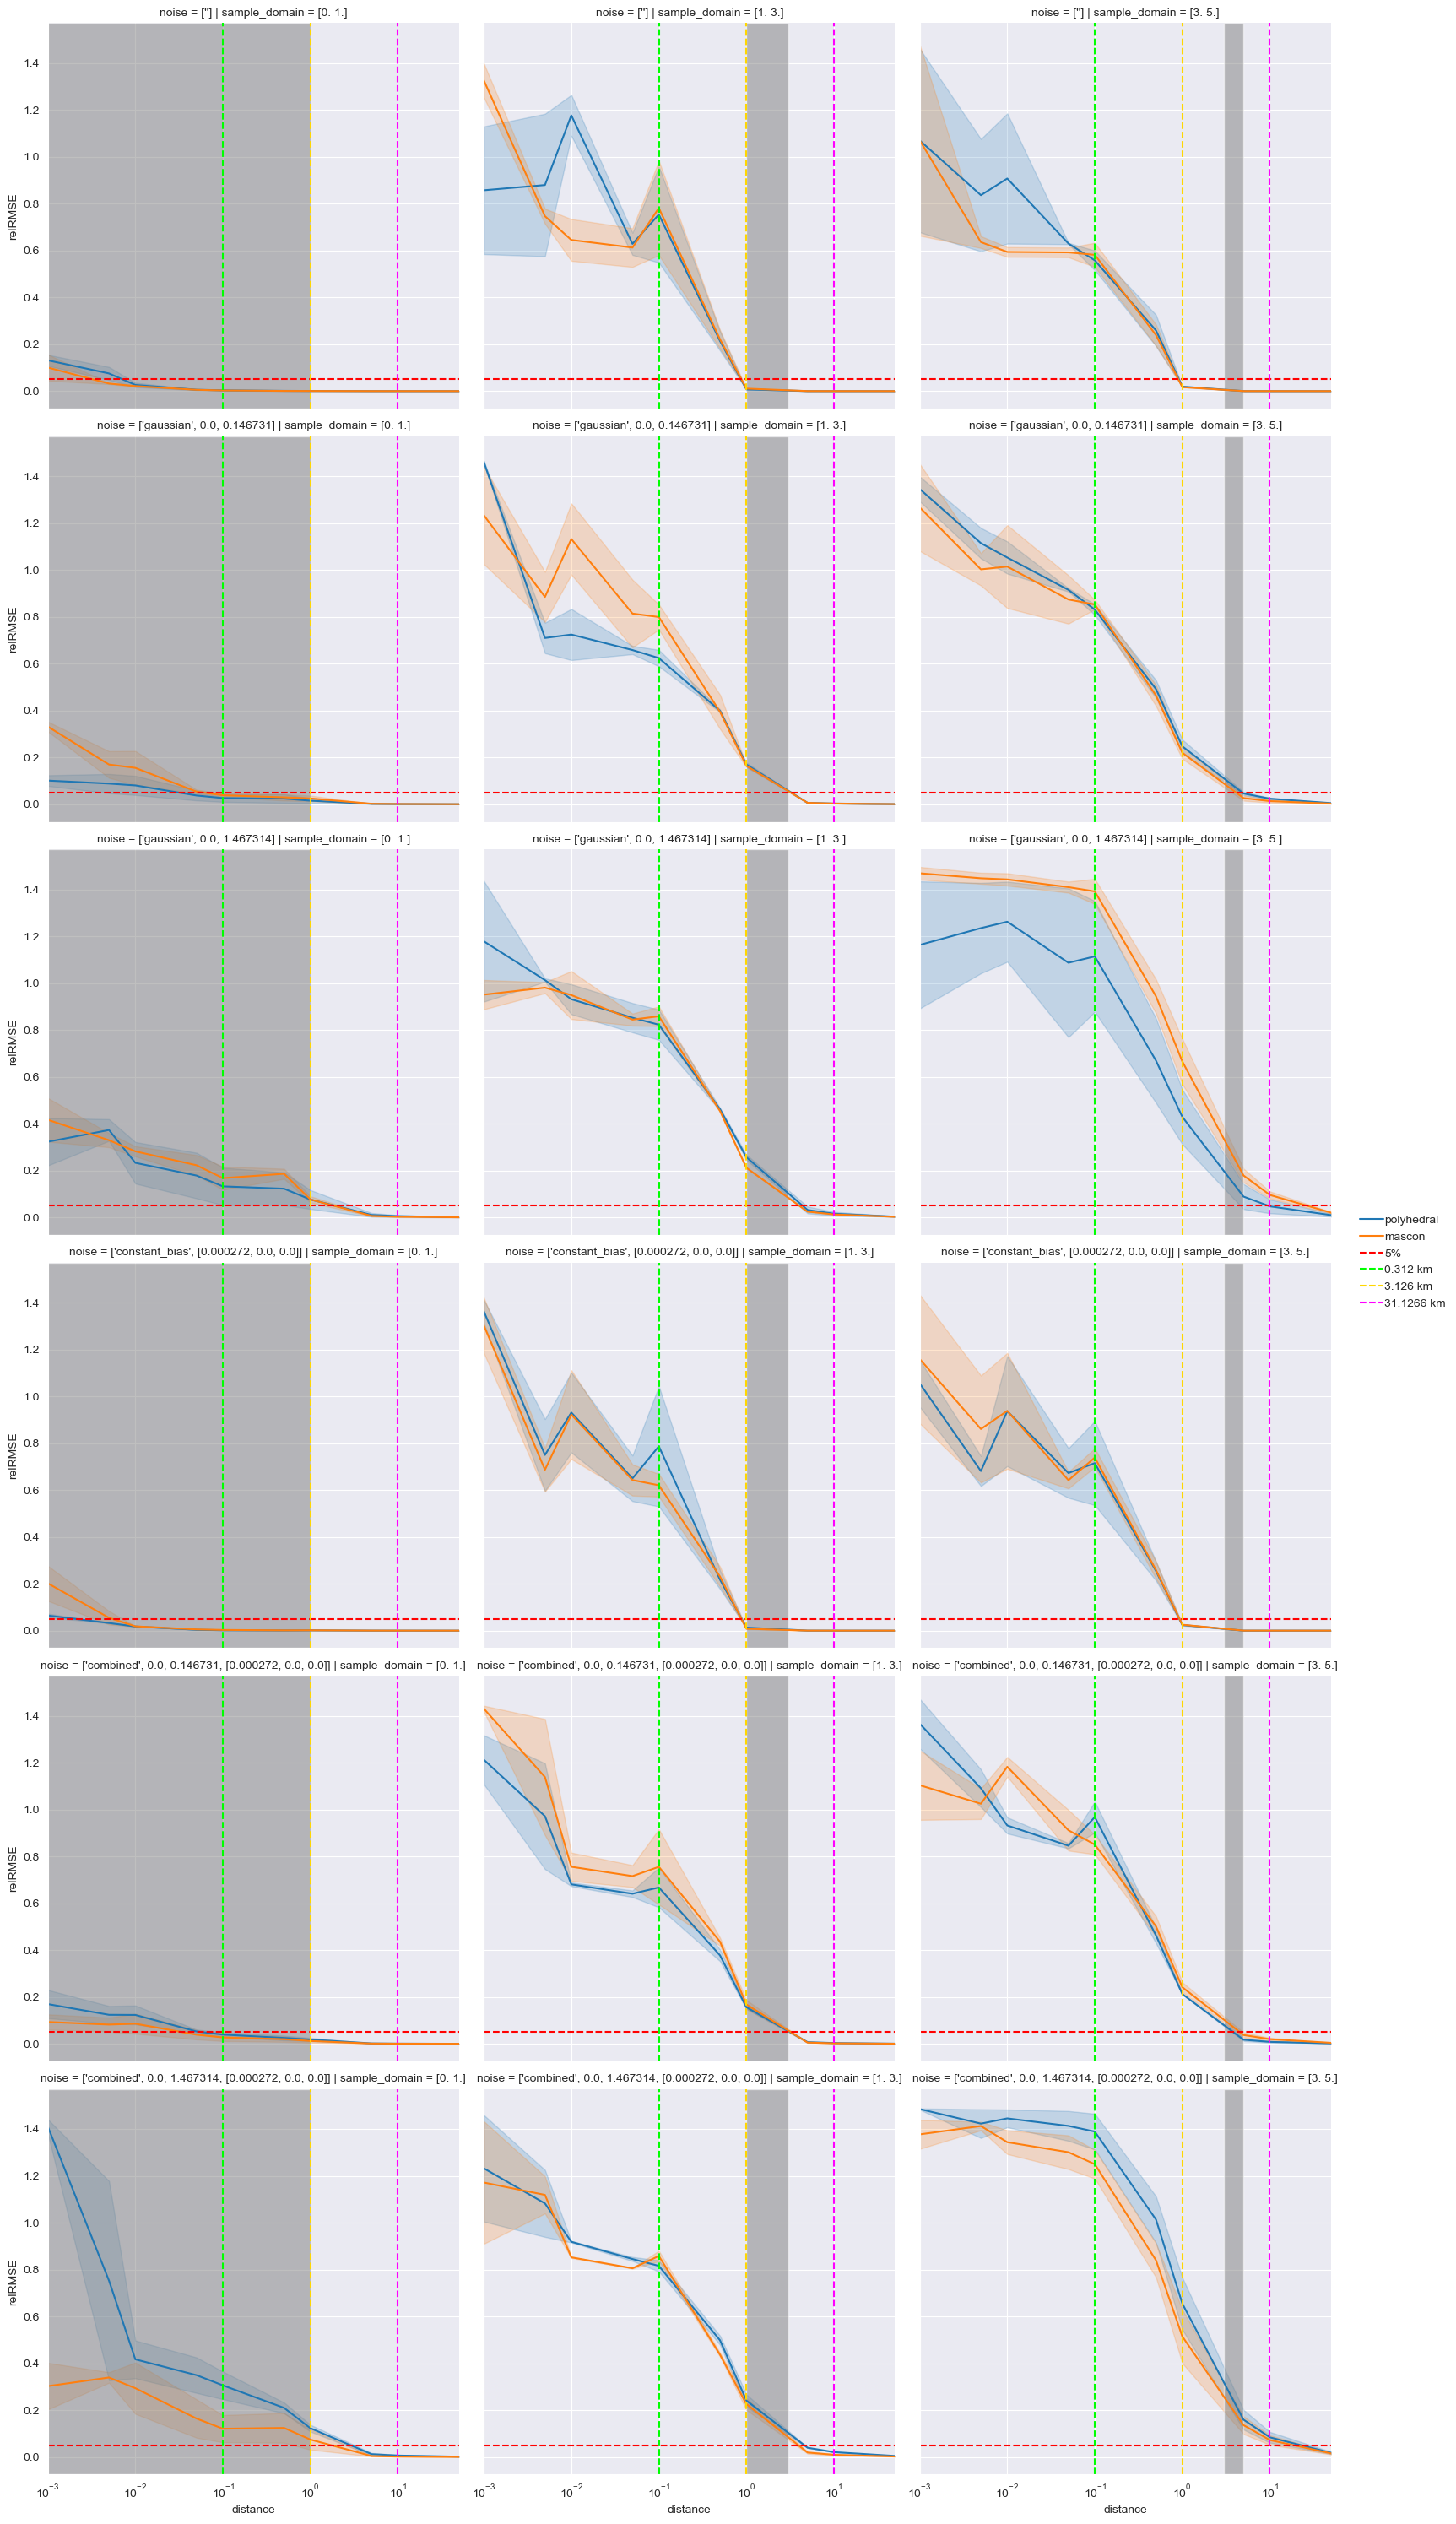

In [15]:
g = sns.relplot(
    data=dfm, kind="line",
    x="distance", y=error_of_interest, col="sample_domain", row="noise",
    col_order=["[0. 1.]", "[1. 3.]", "[3. 5.]"],
    row_order=["['']", "['gaussian', 0.0, 0.146731]", "['gaussian', 0.0, 1.467314]",
               "['constant_bias', [0.000272, 0.0, 0.0]]", "['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]]",
               "['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]]"],
    hue_order=["polyhedral", "mascon"],
    hue="ground_truth"
)
g.set(xlim=(0.0, 50.0), xscale='log')
g.map(plt.axhline, y=0.05, ls='--', c='red', label="5%")
g.map(plt.axvline, x=0.1, ls='--', c='lime', label="0.312 km")
g.map(plt.axvline, x=1.0, ls='--', c='gold', label="3.126 km")
g.map(plt.axvline, x=10.0, ls='--', c='fuchsia', label="31.1266 km")

for ax in g.axes[:,0]:
    ax.axvspan(0, 1.0, facecolor='gray', alpha=0.5)
for ax in g.axes[:,1]:
    ax.axvspan(1.0, 3.0, facecolor='gray', alpha=0.5)
for ax in g.axes[:,2]:
    ax.axvspan(3.0, 5.0, facecolor='gray', alpha=0.5)

# g.set_titles(col_template="{col_name} patrons", row_template="{row_name}")
# g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
g.legend.remove()
g.add_legend(handletextpad=0.1)
g.tight_layout()
save_path = os.path.join(output_directory, f"{sample}_norm_{error_of_interest}_line.png")
g.savefig(save_path, dpi=300)

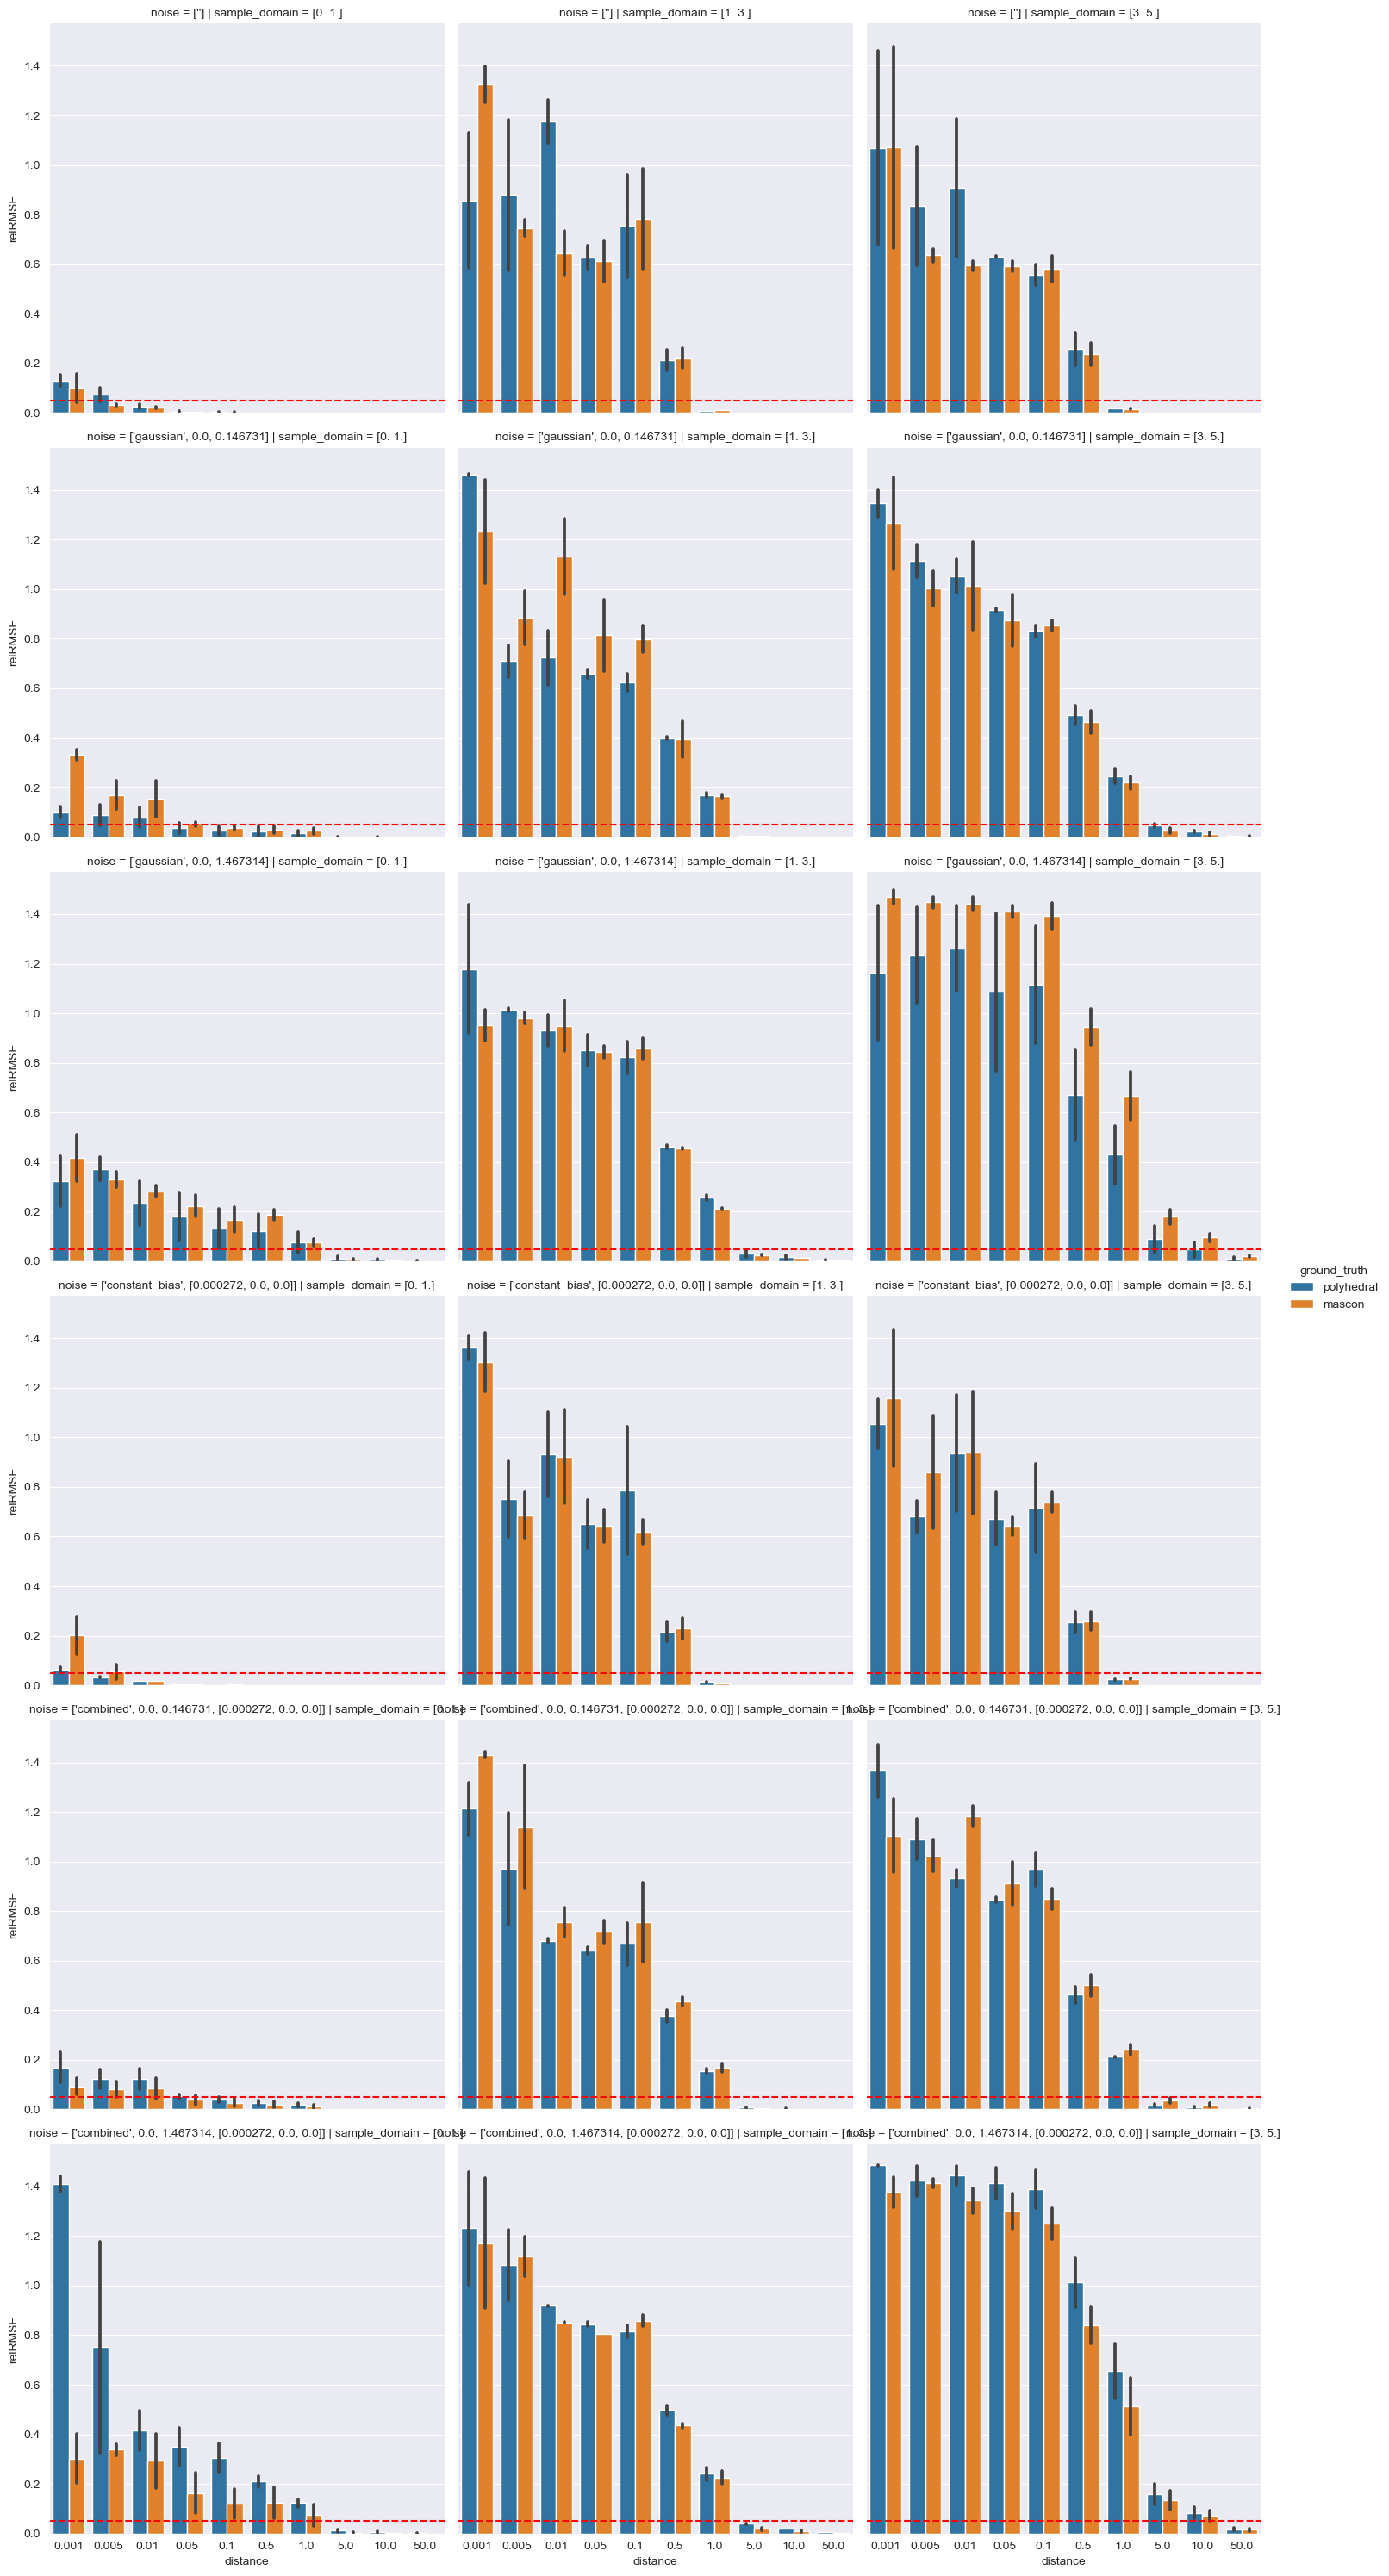

In [16]:
g = sns.catplot(
    data=dfm, kind="bar",
    x="distance", y=error_of_interest, col="sample_domain", row="noise",
    col_order=["[0. 1.]", "[1. 3.]", "[3. 5.]"],
    row_order=["['']", "['gaussian', 0.0, 0.146731]", "['gaussian', 0.0, 1.467314]",
               "['constant_bias', [0.000272, 0.0, 0.0]]", "['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]]",
               "['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]]"],
    hue_order=["polyhedral", "mascon"],
    hue="ground_truth"
)
g.map(plt.axhline, y=0.05, ls='--', c='red')
# g.set_titles(col_template="{col_name} patrons", row_template="{row_name}")
# g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
g.tight_layout()
save_path = os.path.join(output_directory, f"{sample}_norm_{error_of_interest}_bar.png")
g.savefig(save_path, dpi=300)